In [1]:
import numpy as np

Forward Propagation

In [2]:
input_data = np.array([3, 5], dtype=float)

print(input_data)

[3. 5.]


In [3]:
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

print(weights)

{'node_0': array([2, 4]), 'node_1': array([ 4, -5]), 'output': array([2, 7])}


In [4]:
layer_0 = (input_data * weights['node_0']).sum()

print(f"layer_0 : {layer_0}")

layer_0 : 26.0


In [5]:
layer_1 = (input_data * weights['node_1']).sum()

print(f"layer_1 : {layer_1}")

layer_1 : -13.0


In [6]:
hidden_layer_0 = np.array([layer_0, layer_1])

output_layer = (hidden_layer_0 * weights['output']).sum()

print(output_layer)

-39.0


In [7]:
def relu(num):
  return max(0, num)

In [8]:
layer_0 = (input_data * weights['node_0']).sum()
layer_0 = relu(layer_0)
print(layer_0)

26.0


In [9]:
layer_1 = (input_data * weights['node_1']).sum()
layer_1 = relu(layer_1)
print(layer_1)

0


In [10]:
hidden_layer_0 = np.array([layer_0, layer_1])

output_layer = (hidden_layer_0 * weights['output']).sum()

print(output_layer)

52.0


More Layer

In [11]:
weights = {'node_0_0': np.array([2, 4]),
           'node_0_1': np.array([ 4, -5]),
           'node_1_0': np.array([-1,  2]),
           'node_1_1': np.array([1, 2]),
           'output': np.array([2, 7])
          }

print(weights)

{'node_0_0': array([2, 4]), 'node_0_1': array([ 4, -5]), 'node_1_0': array([-1,  2]), 'node_1_1': array([1, 2]), 'output': array([2, 7])}


In [12]:
layer_00 = relu((input_data * weights['node_0_0']).sum())
layer_01 = relu((input_data * weights['node_0_1']).sum())

layer_0 = np.array([layer_00, layer_01])
print(layer_0)

[26.  0.]


In [13]:
layer_10 = relu((layer_0 * weights['node_1_0']).sum())
layer_11 = relu((layer_0 * weights['node_1_1']).sum())

layer_1 = np.array([layer_10, layer_11])
print(layer_1)

[ 0. 26.]


In [14]:
output = (layer_1 * weights['output']).sum()

print(output)

182.0


Backward Prop

In [15]:
input_data = np.array([0, 3])

weights_0 = {'node_0': [2, 1], 'node_1': [1, 2], 'output': [1, 1]}

target_actual = 3

In [16]:
layer_0 = relu((input_data * weights_0['node_0']).sum())

layer_1 = relu((input_data * weights_0['node_1']).sum())

hidden_layer = np.array([layer_0, layer_1])

output_0 = (hidden_layer * weights_0['output']).sum()

print(output_0)

9


In [17]:
error_0 = output_0 - target_actual

print(error_0)

6


In [18]:
weights_1 = {'node_0': [2, 1], 'node_1': [1, 2], 'output': [1, 0]}

In [19]:
layer_0 = relu((input_data * weights_1['node_0']).sum())

layer_1 = relu((input_data * weights_1['node_1']).sum())

hidden_layer = np.array([layer_0, layer_1])

output_1 = (hidden_layer * weights_1['output']).sum()

print(output_1)

3


In [20]:
error_1 = output_1 - target_actual

print(error_1)

0


In [21]:
def predict_with_network(input_data, weight):
  layer_0 = relu((input_data * weight['node_0']).sum())
  layer_1 = relu((input_data * weight['node_1']).sum())
  hidden_layer = np.array([layer_0, layer_1])
  output = (hidden_layer * weight['output']).sum()
  return output

In [22]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]
weights_1 = {'node_0': [2, 1], 'node_1': [1, 1.5], 'output': [1, 1.5]}

from sklearn.metrics import mean_squared_error

model_output_0 = []

model_output_1 = []

for row in input_data:
    model_output_0.append(predict_with_network(row, weights_0))
    
    model_output_1.append(predict_with_network(row, weights_1))

mse_0 = mean_squared_error(target_actuals, model_output_0)

mse_1 = mean_squared_error(target_actuals, model_output_1)

print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


Gradient Descent

In [23]:
weights = np.array([0, 2, 1])

inputs = np.array([1, 2, 3])

target = 0

preds = (weights * inputs).sum()

print(preds)

7


In [24]:
error = preds - target

slope = 2 * inputs * error

print(slope)

[14 28 42]


In [25]:
learning_rate = 0.01

preds = (weights * inputs).sum()

error = preds - target

slope = 2 * inputs * error

weights_updated = weights - learning_rate * slope

preds_updated = (weights_updated * inputs).sum()

error_updated = preds_updated - target

print(error)

print(error_updated)

7
5.04


In [26]:
epochs = 20

mse_hist = []

learning_rate = 0.01

weights = [0, 2, 1]

input_data = np.array([1, 2, 3])

target = 0

for i in range(epochs):
  pred = (input_data * weights).sum()

  error = pred - target

  mse_hist.append(error)

  slope = 2 * input_data * error

  weights = weights - learning_rate * slope

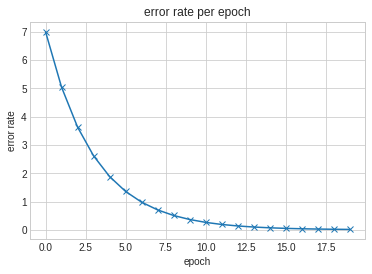

In [27]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

plt.plot([*range(epochs)], mse_hist, marker='x')
plt.xlabel("epoch")
plt.ylabel("error rate")
plt.title("error rate per epoch")
plt.show()